In [15]:
# Data structure to create a data frame
import pandas as pd 
# Data visualization
import seaborn as sns
# Five block framework
import matplotlib.pyplot as plt
# Data manipulation
import numpy as np
import sklearn as skl

# partitioning data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# preprocess data before feeding to algorithm
from sklearn import preprocessing

In [16]:
# Exclude header and make a new header
column_names = ["Pregnant", "Glucose", "BP", "Skin", "Insulin", "BMI", "Pedigree", "Age", "DM"]
# Load dataset
data_set = pd.read_csv("pima_diabetes.csv", header = None, names=column_names, skiprows=(0,0))

In [17]:
data_set.head()

,Pregnant,Glucose,BP,Skin,Insulin,BMI,Pedigree,Age,DM
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
# Check data information if there is null or not
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pregnant  768 non-null    int64  
 1   Glucose   768 non-null    int64  
 2   BP        768 non-null    int64  
 3   Skin      768 non-null    int64  
 4   Insulin   768 non-null    int64  
 5   BMI       768 non-null    float64
 6   Pedigree  768 non-null    float64
 7   Age       768 non-null    int64  
 8   DM        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
data_set.describe()

,Pregnant,Glucose,BP,Skin,Insulin,BMI,Pedigree,Age,DM
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [20]:
# convert string to number
covert_col = ["Pregnant", "Insulin", "BMI", "Age", "BP", "Pedigree"]
for col in covert_col:
    data_set[col] = pd.to_numeric(data_set[col])

In [31]:
# Feature selection
feature_col = ["Pregnant", "Insulin", "BMI", "Age", "Glucose", "BP" ,"Pedigree"]
X = data_set[feature_col]
y = data_set.DM


Text(0.5, 249.0, 'Feature Values on X axis')

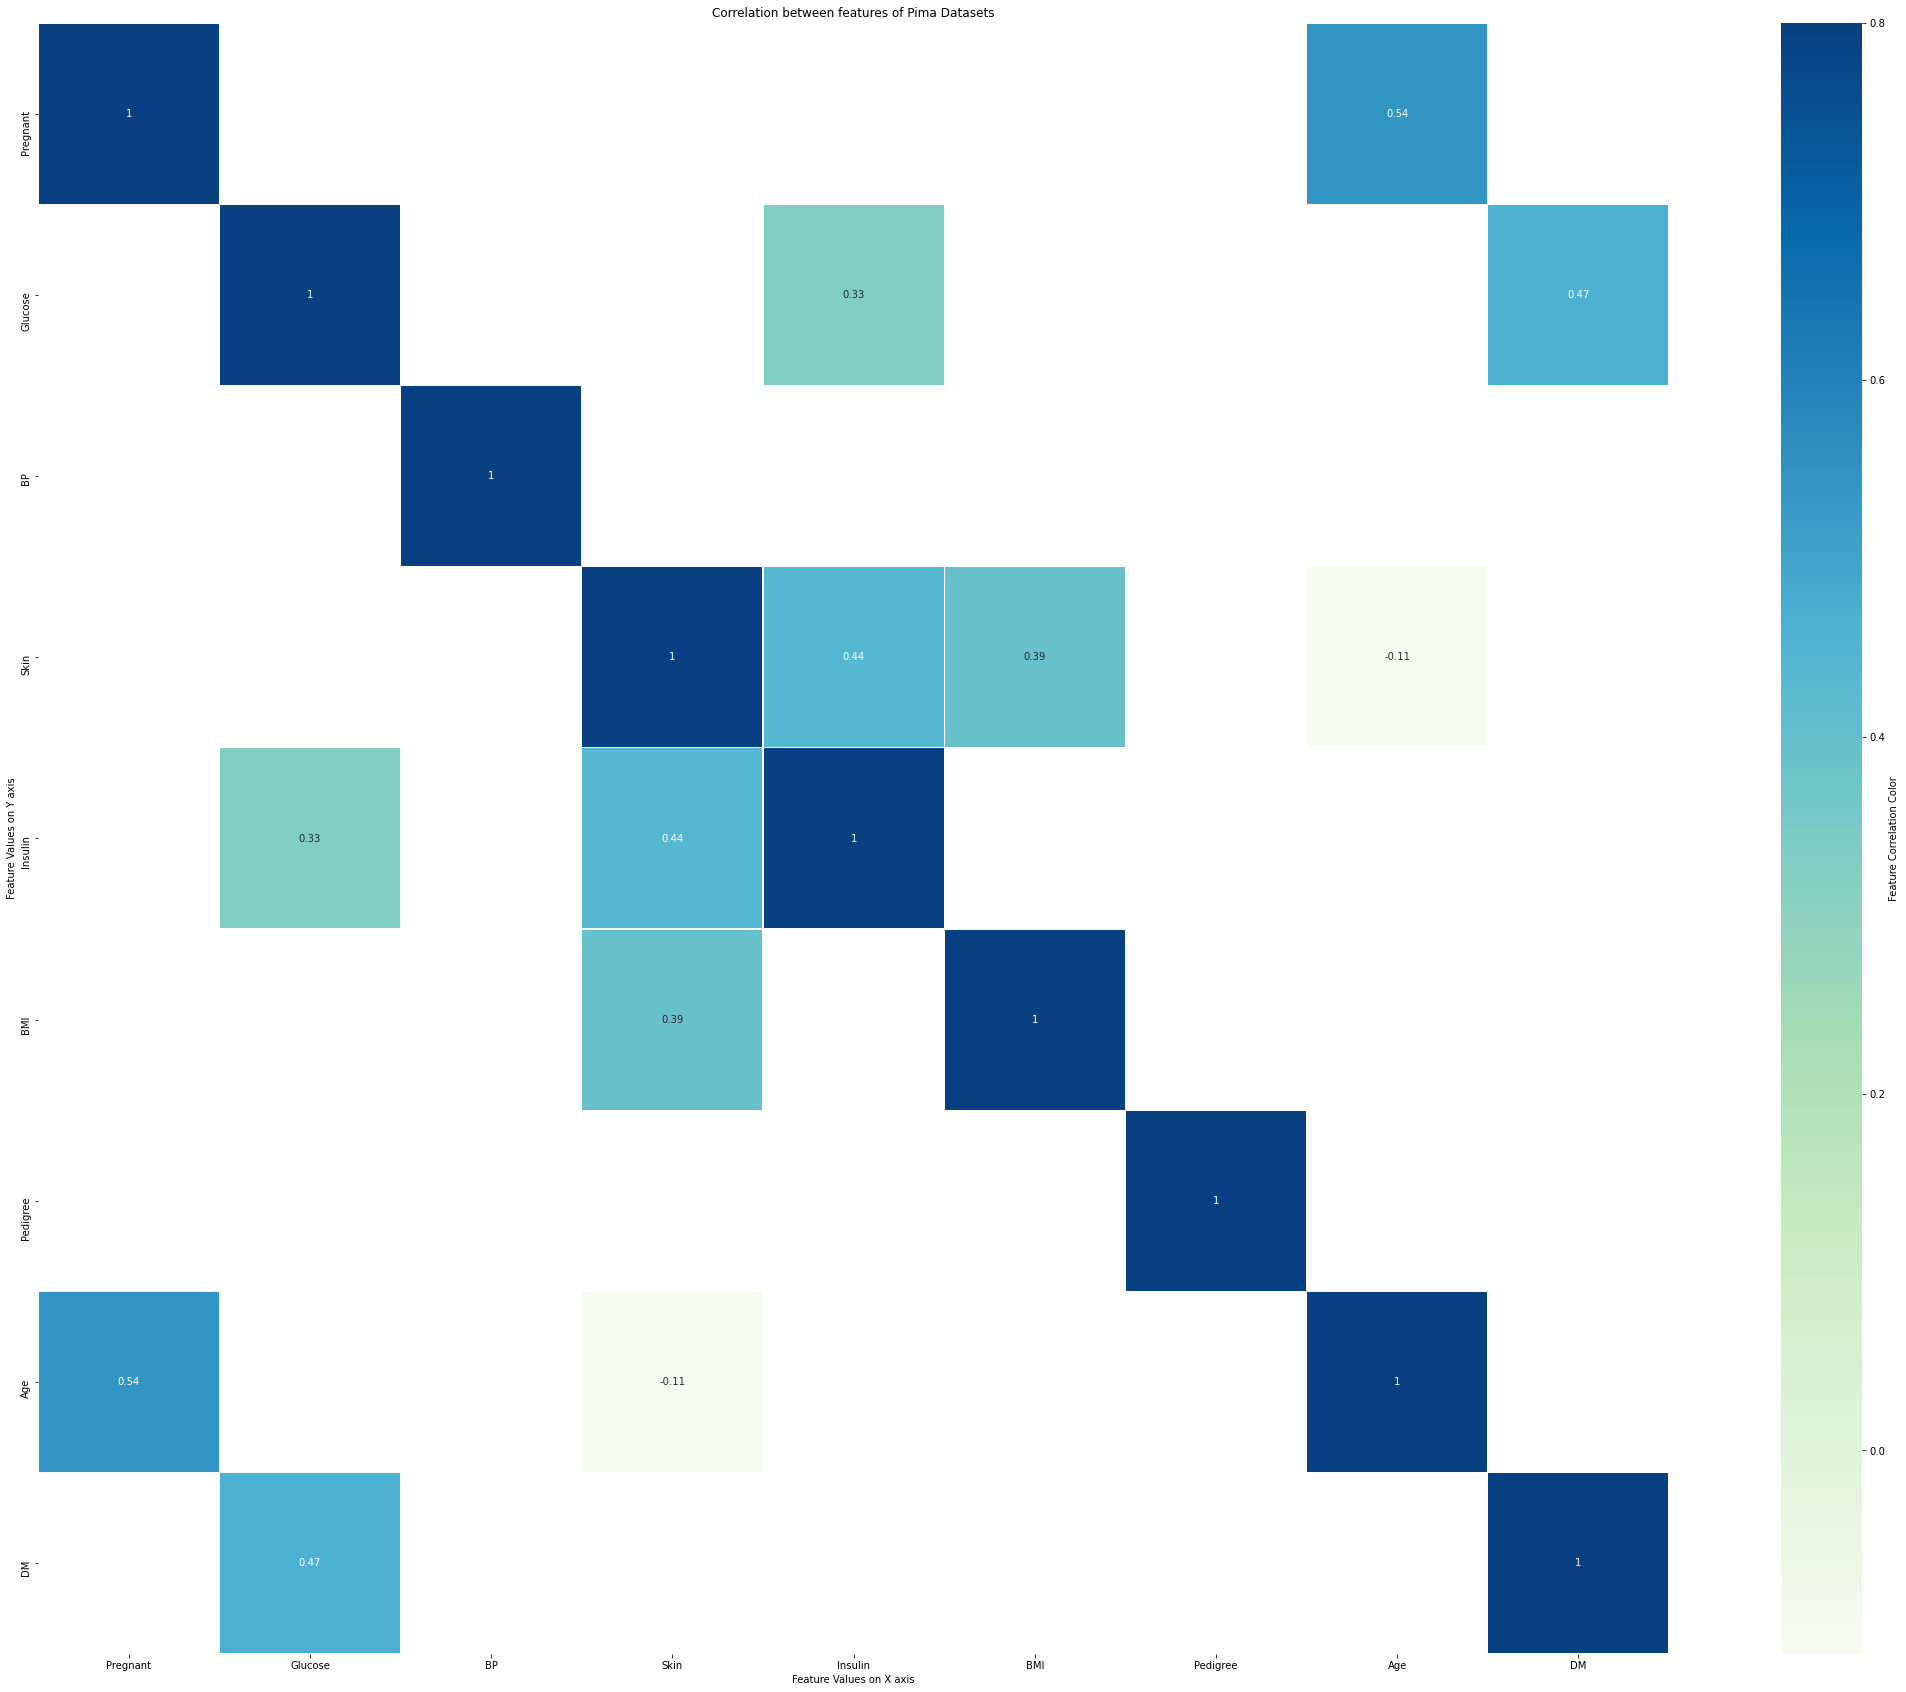

In [27]:
# Check correlation and correlation plot 
corr = data_set.corr()
plt.figure(figsize=(40, 30))

# Set cor range
coor_range = corr[(corr >= 0.3) | (corr <= -0.1)]

sns.heatmap(coor_range, vmax=0.8, linewidths=0.01, square=True, annot=True, cmap='GnBu', linecolor="white", cbar_kws={'label': 'Feature Correlation Color'})
plt.title('Correlation between features of Pima Datasets')
plt.ylabel("Feature Values on Y axis")
plt.xlabel("Feature Values on X axis")




In [38]:
#Split the dataset into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42) 
#Same accurcy so we use random_state = 42
# X is independent data, y is dependent data

In [39]:
# Applying Logistic Regression Algorithm
logistic_function=LogisticRegression()

In [40]:
# Fit the model with the training data
logistic_function.fit(X_train, y_train)
y_prediction = logistic_function.predict(X_test)


C:\Users\Tiffany\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
# Model Evaluation using Confusin Matrix for the performance of classification model
from sklearn import metrics

cnf_matrix_evaluation = metrics.confusion_matrix(y_test, y_prediction)
# [True positive, True negative], [False positive, False negative]
cnf_matrix_evaluation

array([[79, 20],
       [19, 36]], dtype=int64)

Text(0.5, 257.44, 'Predicted DMs')

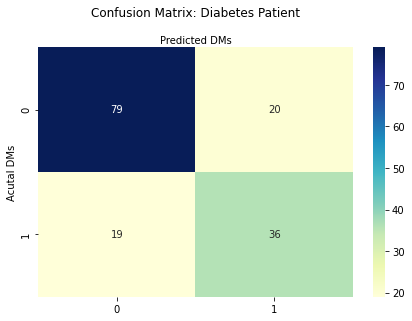

In [49]:
# Visulize our data
# naming class
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Creating a heapmap for getting the confusion matrix
sns.heatmap(pd.DataFrame(cnf_matrix_evaluation), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix: Diabetes Patient", y=1.1)
plt.ylabel("Acutal DMs")
plt.xlabel("Predicted DMs")



In [52]:
# Check accuracy of model
print("Accuracy: ", metrics.accuracy_score(y_test, y_prediction))
print("Precision: ", metrics.precision_score(y_test, y_prediction))
print("Recall: ", metrics.recall_score(y_test, y_prediction))
print(metrics.accuracy_score(y_test, y_prediction) * 100, "% :", "chances that person having diabetes in the present dataset")

print(y_prediction)
    

Accuracy:  0.7467532467532467
Precision:  0.6428571428571429
Recall:  0.6545454545454545
74.67532467532467 % : chances that person having diabetes in the present dataset
[0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


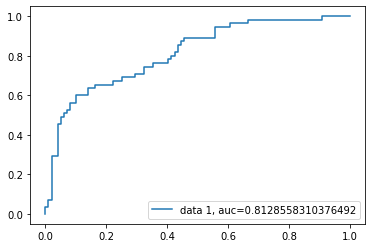

In [57]:
# Using Receiver Operating Characteristic(ROC) curve to evaluate the performance 
# ROC curve shows tradeoff between sensitivity and specificity

y_prediction_probability = logistic_function.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_prediction_probability)
auc = metrics.roc_auc_score(y_test, y_prediction_probability)
plt.plot(fpr, tpr, label="data 1, auc=" + str(auc))
plt.legend(loc=4)
plt.show()

In [58]:
from sklearn.metrics import f1_score

In [59]:
# Weighted average of precision and recall
f1_score(y_test, y_prediction, average=None)

array([0.80203046, 0.64864865])